## Diamond Price Prediction
#####  Introduction About the Data :
 The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

##### 1.id : unique identifier of each diamond 
##### 2.carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
##### 3.cut : Quality of Diamond Cut
##### 4.color : Color of Diamond
##### 5.clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
##### 6.depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
##### 7.table : A diamond's table is the facet which can be seen when the stone is viewed face up.
##### 8.x : Diamond X dimension
##### 9.y : Diamond Y dimension
##### 10.x : Diamond Z dimension
##### 11.Target variable: 
##### price: Price of the given Diamond.

Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

In [1]:
import pandas as pd

In [2]:
df = pd .read_csv("data/gemstone.csv")

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
### No Missing Values present in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
#Lets drop id column as it is not important for predicting the price 
df = df.drop(labels =['id'],axis=1)

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [9]:
#check for the duplicated records
df.duplicated().sum()

0

In [10]:
#drop duplicates if any
#df.drop_duplicates()

In [11]:
#Segreggate numerical and categorical features
numerical_columns = df.columns[df.dtypes!='object']
categorical_columns = df.columns[df.dtypes=='object']

In [12]:
print(f"Numerical Columns : {numerical_columns} ")
print(f"Categorical Columns : {categorical_columns} ")

Numerical Columns : Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object') 
Categorical Columns : Index(['cut', 'color', 'clarity'], dtype='object') 


In [13]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [14]:
df['cut'].nunique()

5

In [15]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [16]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [17]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [18]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

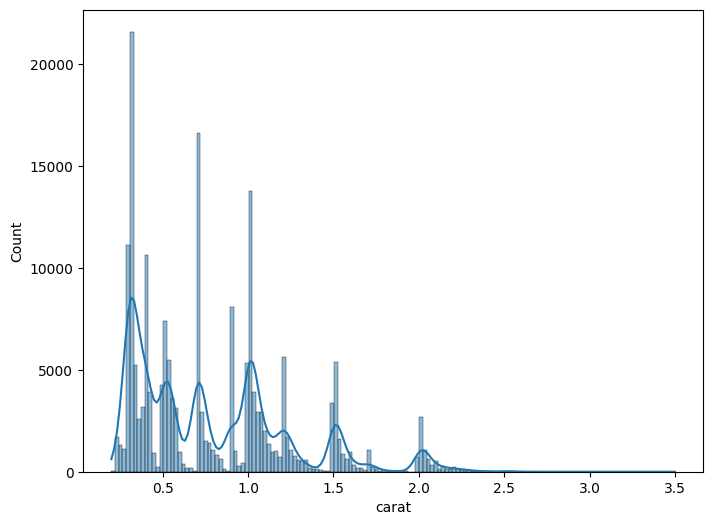

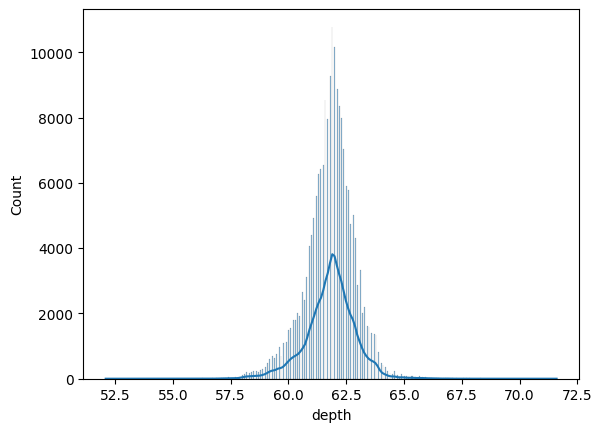

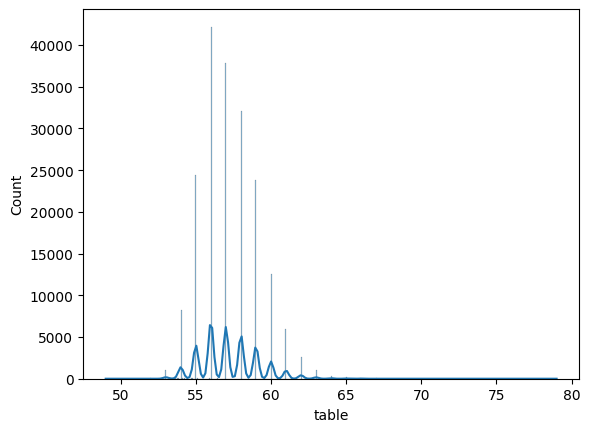

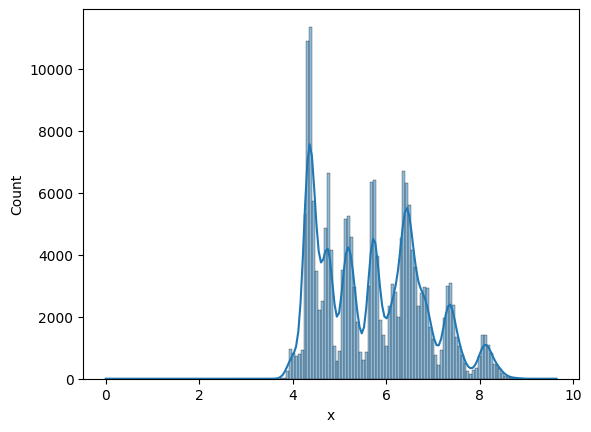

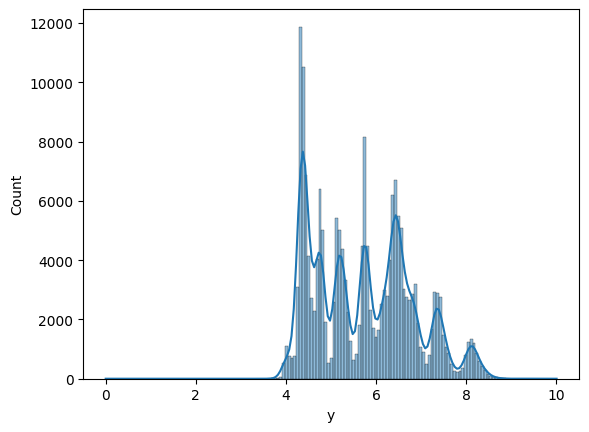

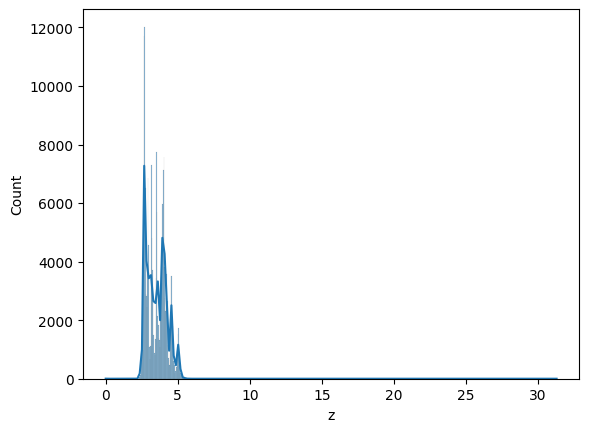

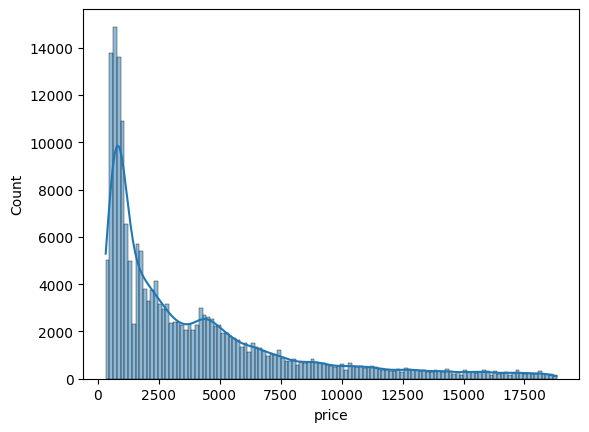

In [19]:
#Lets Plot some graphs of numerical features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=1
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print("\n")
    plt.show()

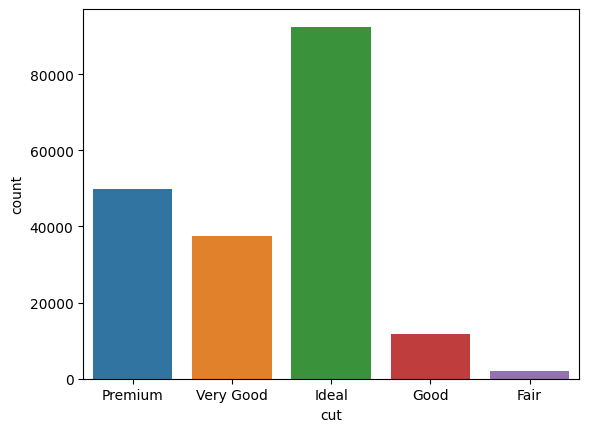

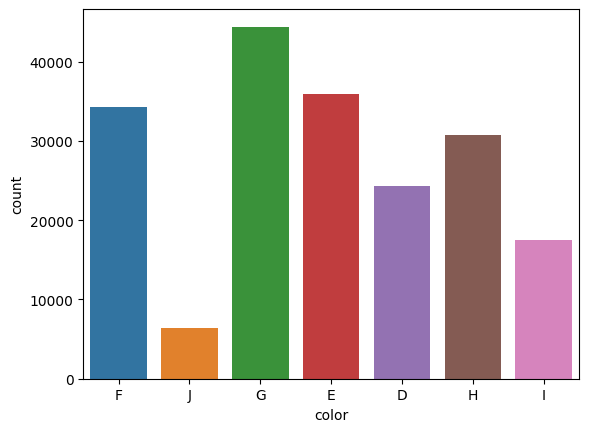

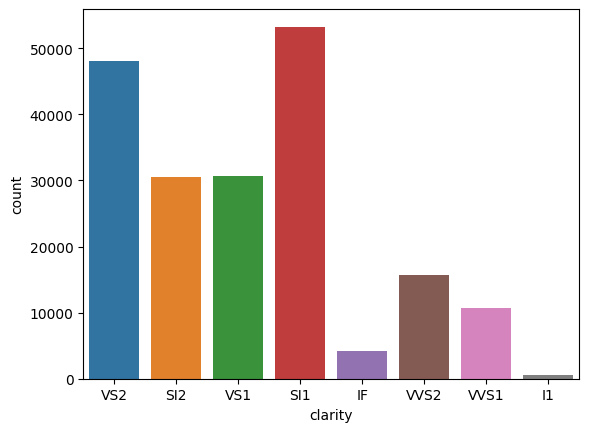

In [20]:
#Plot graph for Categorical variables
x=1
for i in categorical_columns:
    sns.countplot(data=df , x=i)
    print('\n')
    plt.show()

<Axes: >

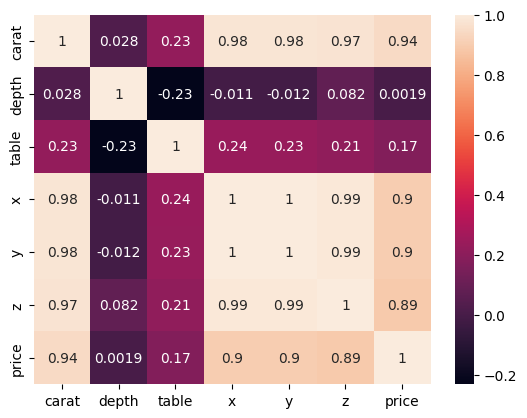

In [21]:
#Correlation
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [22]:
#There is high correlation between x,y and z with each other.So we can drop x,y,z columns
#But write now lets not drop these columns we will drop it later 
#df.drop(labels=['x','y','z'],axis=1)

In [23]:
df_copy=df.copy()

In [24]:
df_copy = df_copy.sample(30000)

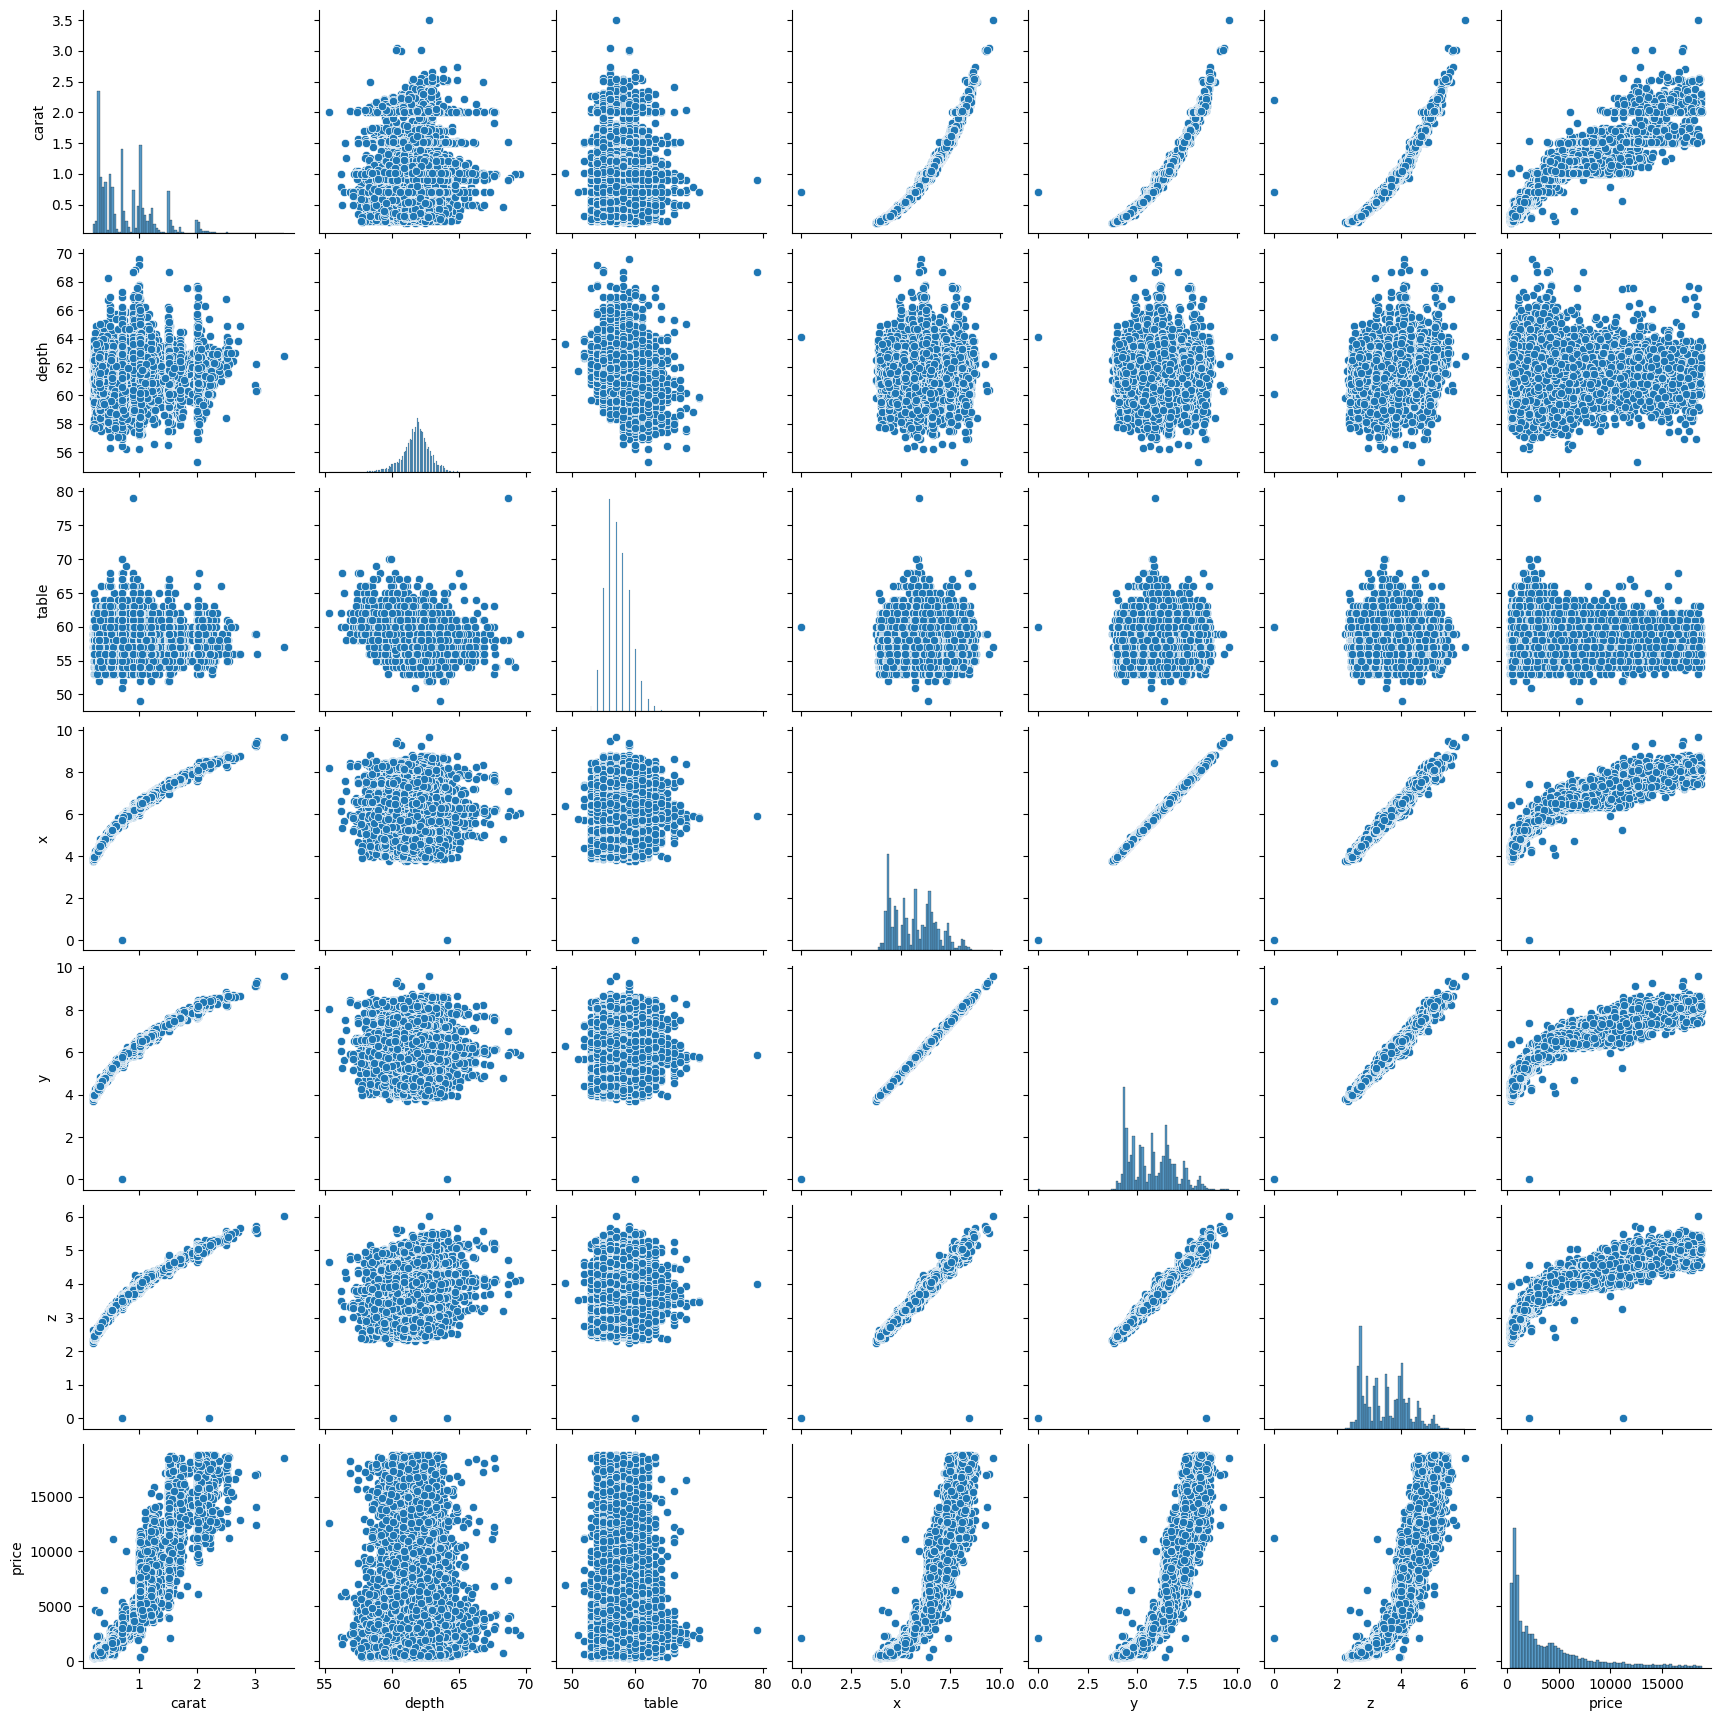

In [25]:
sns.pairplot(df_copy)

In [26]:
#Most of them are positively correlated

In [27]:
#As cut,clarity,color are ordinal features we need to map them with the rank accordingingly
print('Cut Categories :' , df['cut'].unique())
print('='*60)
print('Color Categories :' , df['color'].unique())
print('='*60)
print('Clarity Categories :' , df['clarity'].unique())


Cut Categories : ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
Color Categories : ['F' 'J' 'G' 'E' 'D' 'H' 'I']
Clarity Categories : ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


In [28]:
cut_map = {"Fair":1,"Good":2,"Very Good" : 3,"Premium":4,"Ideal":5}
color_map = {"D":1,"E2":2,"F":3,"G":4,"H":5,"I":6,"J":7}
clarity_map= {"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF": 8}

In [29]:
df["cut"]=df["cut"].map(cut_map)
df["color"]=df["color"].map(color_map)
df["clarity"]=df["clarity"].map(clarity_map)

In [30]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3.0,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7.0,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4.0,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4.0,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4.0,4,62.6,59.0,7.65,7.61,4.77,14453
